In [1]:
#%% Imports
import os
import numpy as np
import spectral
import matplotlib.pyplot as plt
from skimage import exposure, io
from scipy import interpolate
from scipy import ndimage
import importlib      # use importlib.reload(<module>) if module changes after initial load
import time

import cv2   # pip install opencv-python-contrib

# Import "local" packages
import hyspec_io, image_render, preprocess 

In [2]:
#%% Paths
input_file = '/mnt/datadisk/Massimal/20210825_Olbergholmen/08-25/OlbergholmenN-13/OlbergholmenN_Pika_L_13.bil.hdr'
#input_file = '/mnt/datadisk/Massimal/20210825_Olbergholmen/08-25/OlbergholmenS-13/OlbergholmenS_Pika_L_13.bil.hdr'
output_file = '/mnt/datadisk/Massimal/Tmp/Test_Interpolate/OlbergholmenN_Pika_L_13.bil.hdr'
#output_file = '/mnt/datadisk/Massimal/Tmp/Test_Interpolate/OlbergholmenS_Pika_L_13.bil.hdr'

In [3]:
#%% Import data
(im_cube,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(input_file)

In [4]:
#%% Detect saturated pixels
sat_pix_mask = preprocess.detect_saturated(im_cube)

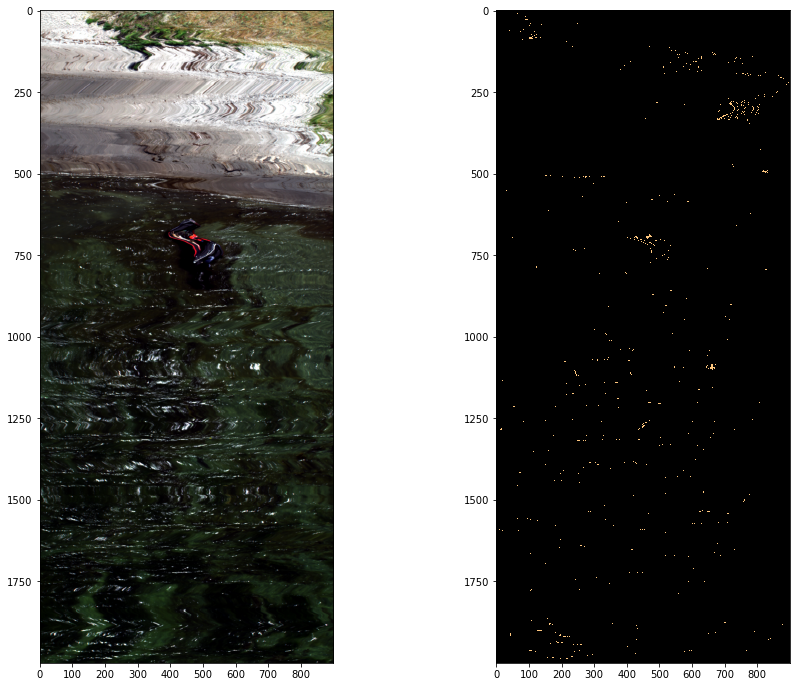

In [5]:
#%% Show saturated pixels
fig,ax = plt.subplots(ncols=2,figsize=(15,12))
ax[0].imshow(image_render.percentile_stretch(im_cube[:,:,rgb_ind]))
ax[1].imshow(sat_pix_mask,interpolation='none',cmap='copper')

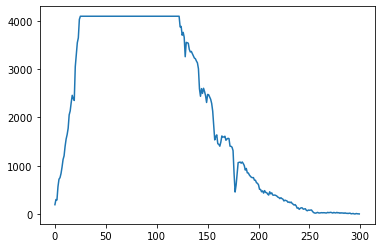

In [6]:
#plt.plot(im_cube[1750,600,:])
#plt.plot(im_cube[79,115,:])
#plt.plot(im_cube[85,105,:])
#plt.plot(im_cube[87,110,:])
plt.plot(im_cube[1096,663,:])

In [7]:
sat_pix_mask[1096,663]

True

In [8]:
np.max(im_cube[1096,663,:])

4095.0

In [9]:
alt_mask = np.any(im_cube >= 4095,axis=2)

In [10]:
comparison = (alt_mask == sat_pix_mask)
comparison.all()

True

In [11]:
# Test inpainting
rgb_inpaint = preprocess.inpaint_masked(im_cube[:,:,rgb_ind],sat_pix_mask)

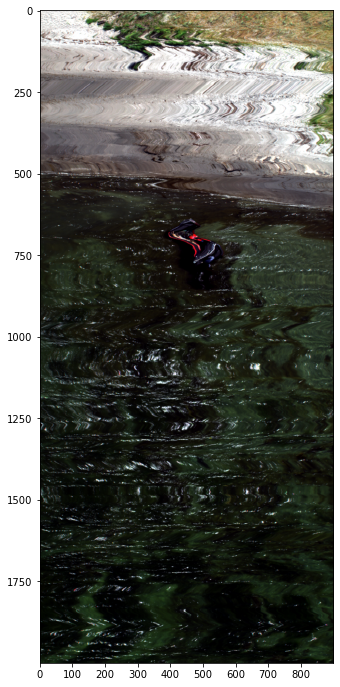

In [12]:
fig,ax = plt.subplots(figsize=(6,12))
plt.imshow(image_render.percentile_stretch(rgb_inpaint))

In [13]:
#%% Try inpainting the whole cube
start_time = time.process_time()
im_cube_inpaint = preprocess.inpaint_masked(im_cube,sat_pix_mask)
print('Inpainting took ' + str(time.process_time() - start_time) + ' seconds.')

Inpainting took 17.145164336 seconds.


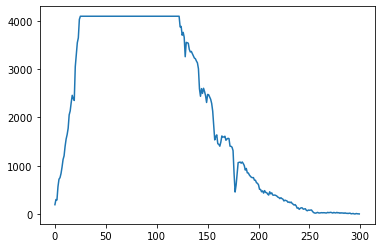

In [14]:
# Plot example spectrum (previously saturated)
plt.plot(im_cube[1096,663,:])

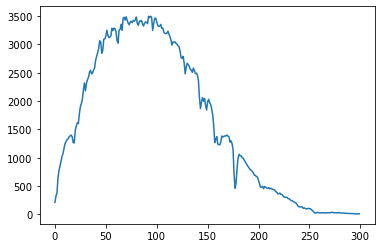

In [15]:
plt.plot(im_cube_inpaint[1096,663,:])

In [22]:
#%% Save the inpainted image
spectral.envi.save_image(output_file,im_cube_inpaint,dtype='uint16',metadata=metadata,force=True)

In [41]:
#%% Save a map of saturated (inpainted) pixels
sat_im_filename = output_file.rsplit(sep='.')[0] + '_saturated.png'
print(sat_im_filename)

/mnt/datadisk/Massimal/Tmp/Test_Interpolate/OlbergholmenN_Pika_L_13_saturated.png


In [44]:
plt.imsave(sat_im_filename,sat_pix_mask,cmap='copper')

In [23]:
#%% Load the inpainted data
(im_cube_ip,wl_ip,rgb_ind_ip,metadata_ip) = hyspec_io.load_envi_image(output_file)


In [24]:
metadata_ip

{'samples': '900',
 'lines': '2000',
 'bands': '300',
 'header offset': '0',
 'file type': 'ENVI Standard',
 'data type': '12',
 'interleave': 'bip',
 'byte order': '0',
 'ceiling': '4095',
 'sample binning': '1',
 'spectral binning': '2',
 'shutter': '7.213',
 'shutter units': 'milliseconds',
 'gain': '12',
 'framerate': '100',
 'wavelength units': 'nanometers',
 'wavelength': ['390.860',
  '392.870',
  '394.880',
  '396.890',
  '398.900',
  '400.910',
  '402.920',
  '404.930',
  '406.940',
  '408.960',
  '410.970',
  '412.990',
  '415.000',
  '417.020',
  '419.040',
  '421.060',
  '423.080',
  '425.100',
  '427.120',
  '429.140',
  '431.170',
  '433.190',
  '435.220',
  '437.240',
  '439.270',
  '441.300',
  '443.330',
  '445.360',
  '447.390',
  '449.420',
  '451.450',
  '453.490',
  '455.520',
  '457.560',
  '459.590',
  '461.630',
  '463.670',
  '465.710',
  '467.750',
  '469.790',
  '471.830',
  '473.870',
  '475.910',
  '477.960',
  '480.000',
  '482.050',
  '484.100',
  '486.14

In [25]:
wl_ip

array([ 390.86,  392.87,  394.88,  396.89,  398.9 ,  400.91,  402.92,
        404.93,  406.94,  408.96,  410.97,  412.99,  415.  ,  417.02,
        419.04,  421.06,  423.08,  425.1 ,  427.12,  429.14,  431.17,
        433.19,  435.22,  437.24,  439.27,  441.3 ,  443.33,  445.36,
        447.39,  449.42,  451.45,  453.49,  455.52,  457.56,  459.59,
        461.63,  463.67,  465.71,  467.75,  469.79,  471.83,  473.87,
        475.91,  477.96,  480.  ,  482.05,  484.1 ,  486.14,  488.19,
        490.24,  492.29,  494.34,  496.39,  498.45,  500.5 ,  502.56,
        504.61,  506.67,  508.73,  510.79,  512.84,  514.9 ,  516.97,
        519.03,  521.09,  523.15,  525.22,  527.29,  529.35,  531.42,
        533.49,  535.56,  537.63,  539.7 ,  541.77,  543.84,  545.92,
        547.99,  550.07,  552.14,  554.22,  556.3 ,  558.38,  560.46,
        562.54,  564.62,  566.7 ,  568.78,  570.87,  572.95,  575.04,
        577.13,  579.21,  581.3 ,  583.39,  585.48,  587.58,  589.67,
        591.76,  593

In [26]:
im_cube_ip.shape

(2000, 900, 300)